## Questão 1)

In [1]:
import numpy as np

In [2]:
def euler_method(f, t0, y0, tf, n):
    """
    Solve the ODE dy/dx = f(x, y) using Euler's method.
    Parameters:
    f : callable
        The function representing the ODE dy/dx = f(x, y).
    t0 : float
        The initial value of time.
    y0 : float
        The initial value of y.
    tf : float
        The final value of time.
    n : int
        The number of steps to take from t0 to tf.
    Returns:
    results : list
        The array of tuples values.
    """

    delta = (tf - t0) / n
    i = 0
    results = [(t0, y0)]
    
    while i < n:
        tn = t0 + i * delta
        tmp_f = f(tn, y0)
        yn = y0 + delta * tmp_f
        results.append((tn, yn))
        y0 = yn
        i += 1

    return results

In [3]:
def func(x,y):
    return 0.04*y

result = euler_method(func, 0, 1000, 1, 1)
print(result)

[(0, 1000), (0.0, 1040.0)]


In [4]:
def improved_euler_method(f, t0, y0, tf, n):
    """
    Solve the ODE dy/dx = f(x, y) using improved Euler's method.
    Parameters:
    f : callable
        The function representing the ODE dy/dx = f(x, y).
    t0 : float
        The initial value of time.
    y0 : float
        The initial value of y.
    tf : float
        The final value of time.
    n : int
        The number of steps to take from t0 to tf.
    Returns:
    results : list
        The array of tuples values.
    """

    delta = (tf - t0) / n
    i = 0
    results = [(t0, y0)]
    
    while i < n:
        k1 = f(t0, y0)
        k2 = f(t0 + delta, y0 + k1)
        yn = y0 + (delta / 2) * (k1 + k2)

        t0 = t0 + delta
        y0 = yn
        i += 1

        results.append((t0, yn))

    return results

In [5]:
def func(x,y):
    return 0.04*y

result = improved_euler_method(func, 0, 1000, 1, 1)
print(result)

[(0, 1000), (1.0, 1040.8)]


In [ ]:
def runge_kutta_ralston_method(f, t0, y0, tf, n):
    """
    Solve the ODE dy/dx = f(x, y) using ralston method.
    Parameters:
    f : callable
        The function representing the ODE dy/dx = f(x, y).
    t0 : float
        The initial value of time.
    y0 : float
        The initial value of y.
    tf : float
        The final value of time.
    n : int
        The number of steps to take from t0 to tf.
    Returns:
    results : list
        The array of tuples values.
    """

    delta = (tf - t0) / n
    i = 0
    results = [(t0, y0)]
    
    while i < n:
        k1 = f(t0, y0)
        k2 = f(t0 + delta/2, y0 + k1/2)
        k3 = f(t0 + 3/4*delta, y0 + 3/4*k2)

        yn = y0 + (delta / 9) * (2*k1 + 3*k2 + 4*k3)

        t0 = t0 + delta
        y0 = yn
        i += 1

        results.append((t0, yn))

    return results

In [7]:
def func(x,y):
    return 0.04*y

result = improved_euler_method(func, 0, 1000, 1, 1)
print(result)

[(0, 1000), (1.0, 1040.8)]


In [8]:
def runge_kutta_classic_method(f, t0, y0, tf, n):
    """
    Solve the ODE dy/dx = f(x, y) using runge kutta classic method.
    Parameters:
    f : callable
        The function representing the ODE dy/dx = f(x, y).
    t0 : float
        The initial value of time.
    y0 : float
        The initial value of y.
    tf : float
        The final value of time.
    n : int
        The number of steps to take from t0 to tf.
    Returns:
    results : list
        The array of tuples values.
    """

    delta = (tf - t0) / n
    i = 0
    results = [(t0, y0)]
    
    while i < n:
        k1 = f(t0, y0)
        k2 = f(t0 + delta/2, y0 + k1/2)
        k3 = f(t0 + delta/2, y0 + k2/2)
        k4 = f(t0 + delta, y0 + k3)

        yn = y0 + (delta / 6) * (k1 + 2*k2 + 2*k3 + k4)

        t0 = t0 + delta
        y0 = yn
        i += 1

        results.append((t0, yn))

    return results

In [9]:
def func(x,y):
    return 0.04*y

result = runge_kutta_classic_method(func, 0, 1000, 1, 1)
print(result)

[(0, 1000), (1.0, 1040.8107733333334)]


## Questão 2

## Letra a)

In [10]:
import matplotlib.pyplot as plt

In [31]:
mi = 0.3
betha = 0.7

def f(t, x):
    s = x[0]
    i = x[1]
    N = s + i

    ds = mi*N - betha*(s*i)/N - mi * s
    di = betha*(s*i)/N - mi*i
    return np.array([ds, di])

ralston_results = runge_kutta_ralston_method(f, 0, np.array([100, 70]), 40, 100)
classic_results = runge_kutta_classic_method(f, 0, np.array([100, 70]), 40, 100)

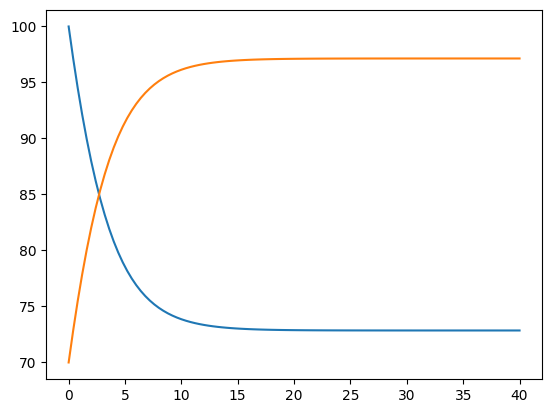

In [ ]:
time = [r[0] for r in ralston_results]
results1 = [r[1][0] for r in ralston_results]
results2 = [r[1][1] for r in ralston_results]

fig, ax = plt.subplots()
ax.plot(time, results1)
ax.plot(time, results2)
plt.show()

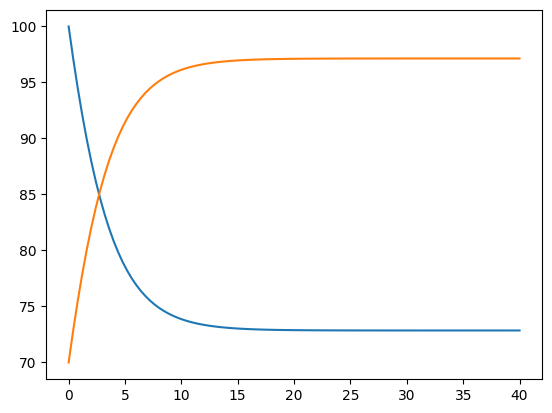

In [34]:
time = [r[0] for r in classic_results]
results1 = [r[1][0] for r in classic_results]
results2 = [r[1][1] for r in classic_results]

fig, ax = plt.subplots()
ax.plot(time, results1)
ax.plot(time, results2)
plt.show()

## Letra b)

In [37]:
steps = range(200, 1000, 10)
errors_r = []
errors_c = []
for n in steps:
    ralston_results = runge_kutta_ralston_method(f, 0, np.array([100, 70]), 40, n)
    classic_results = runge_kutta_classic_method(f, 0, np.array([100, 70]), 40, n)

    time_r = [r[0] for r in ralston_results]
    results1_r = [r[1][0] for r in ralston_results]
    results2_r = [r[1][1] for r in ralston_results]

    time_c = [r[0] for r in classic_results]
    results1_c = [r[1][0] for r in classic_results]
    results2_c = [r[1][1] for r in classic_results]

    error_r = np.abs(np.array(results1_r) - np.array(results1_c)).max()
    error_c = np.abs(np.array(results2_r) - np.array(results2_c)).max()
    errors_r.append(error_r)
    errors_c.append(error_c)

In [39]:
print(error_r)

0.013795737327583879


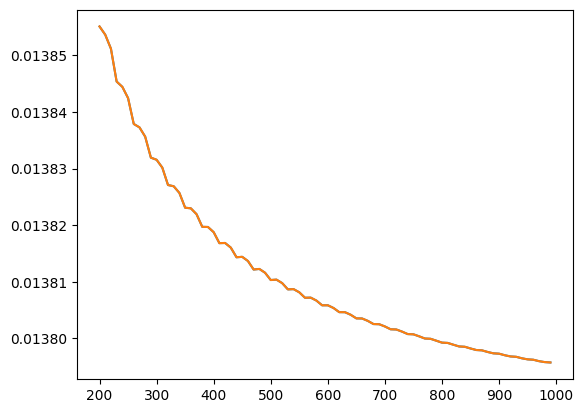

In [40]:
fig, ax = plt.subplots()
ax.plot(steps, errors_r)
ax.plot(steps, errors_c)
plt.show()